In [23]:
import os
import numpy as np
from  sklearn.decomposition import PCA
import h5py
import sqlite3
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

In [6]:
inPath = '/Users/i6o/MINOS/MINOS Nodes/Energy Calibration/Energy_Test_7606/'
dbFiles = [x for x in os.listdir(inPath) if '.sqlite3' in x]
print dbFiles

['Runix05-Energy_Calibration-2012-01-25T02.54.47.167.sqlite3', 'Runix05-Energy_Check_Co57_Co60_Cs137_Th232-2012-01-25T04.22.35.769.sqlite3']


In [10]:
dbFile = dbFiles[1]

In [11]:
global database

class database(object): #database class

    def __init__(self,DBfilename):
        self.conn = sqlite3.connect(DBfilename)
        self.conn.row_factory = sqlite3.Row
    def getTables(self):
        c = self.conn.cursor()
        c.execute("select name from sqlite_master where type = 'table'")
        self.tables=c.fetchall()
        c.close()

    def getHeader(self,tblname):
        c=self.conn.cursor()
        c.execute("select rowid,* from %s" % (tblname))
        self.header=np.array(c.fetchone().keys())
        c.close()

    def getAllData(self,tblname):
        c=self.conn.cursor()
        #c.execute("select rowid,* from %s where tsm>=? and tsm<=?" %(self.tblname,),(tsmbegin,tsmend))
        c.execute("select rowid,* from %s"  % (tblname))
        self.data=self.tableToArray(c)
        c.close()

    def getSomeData(self,tblname,label,t0,tf):
        c=self.conn.cursor()
        c.execute("select rowid,* from %s where %s>=%.1f and %s<%.1f" % (tblname,label,t0,label,tf))
        self.data=self.tableToArray(c)
        return

    def getSomeDataIf(self,tblname,label,t0,tf,x):
        c=self.conn.cursor()
        c.execute("select rowid,* from %s where %s>=%.1f and %s<%.1f and Gate1=%d " % (tblname,label,t0,label,tf,x))
        self.data=self.tableToArray(c)
        return

    def getColumn(self,tbleName,column):
        c=self.conn.cursor()
        c.execute("select %s from %s" % (column,tbleName))
        self.data=c.fetchall()
        c.close()

    def getFirstAndLastRow(self,tblname):
        c=self.conn.cursor()
        c.execute("select rowid,* from %s order by rowid asc limit 1" % (tblname))
        firstRow=self.tableToArray(c)
        c.execute("select rowid,* from %s order by rowid desc limit 1" % (tblname))
        lastRow=self.tableToArray(c)
        return firstRow,lastRow

    def tableToArray(self,c):
        rows=c.fetchall()
        data=[]
        for i in range(len(rows)):
            data.append(list(rows[i]))
        #print data
        #data=np.array(data)
        return data

    def closeConn(self):
        self.conn.close()
        self.data=[]


In [12]:
dataTable='Osprey_216_data'
detDB=database(inPath+dbFile)
detDB.getColumn(dataTable,'Spectrum__IntArray')
spectra1=[np.fromstring(x[0],sep=',',dtype='int') for x in detDB.data]
detDB.getColumn(dataTable,'Time')
Time1 = np.array(detDB.data)[:,0]
detDB.getColumn(dataTable,'Tick')
Tick1 = np.array(detDB.data)[:,0]
detDB.getColumn(dataTable,'TickDelta')
deltaTick1 = np.array(detDB.data)[:,0]
detDB.getColumn(dataTable,'Live_Time')
Live_Time1 = np.array(detDB.data)[:,0]

In [25]:
cpms = np.sum(spectra1,axis=1)

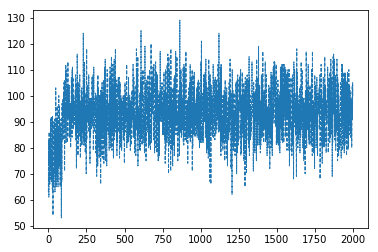

In [28]:
plt.plot(cpms[2000:4000],'--',linewidth=1)

In [39]:
a = np.array(spectra1[2000:4000])
a_standardized = (a[:,:]-a[:,:].mean())/a[:,:].std()

In [50]:
g = PCA(n_components=1000)
g.fit(a)

PCA(copy=True, iterated_power='auto', n_components=1000, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

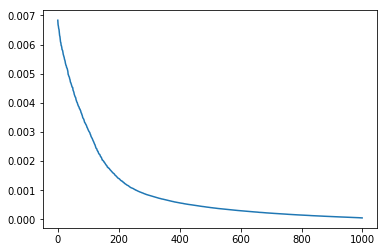

In [52]:
plt.plot(g.explained_variance_ratio_)
plt.yscale('linear')

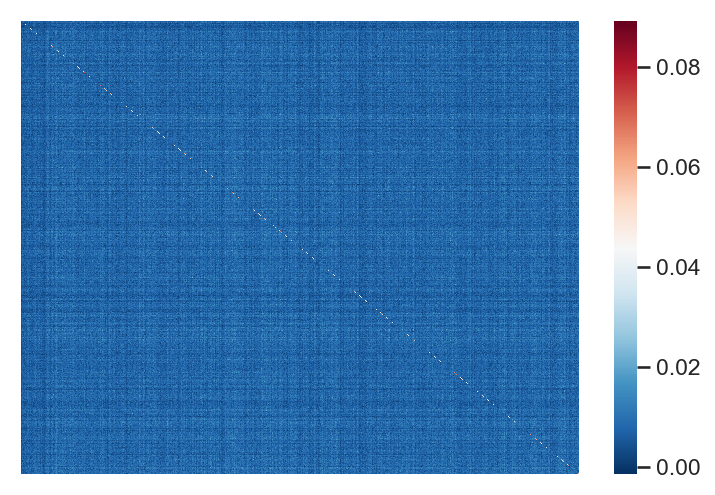

In [62]:
import seaborn as sns
# Exploring correlation matrix
#corr = np.corrcoef(a_standardized.T)
corr = np.corrco(a)
plt.figure(dpi=150)
sns.set(font_scale=1.0)
sns.heatmap(corr,cbar=True,cmap="RdBu_r",yticklabels=[],xticklabels=[])

ValueError: too many values to unpack

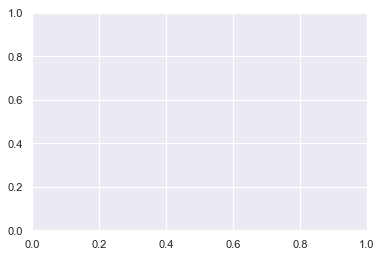

In [60]:
plt.hist2d(a_standardized,a_standardized)